# Encontro amigos

Este projeto tem como objetivo implementar, por meio de um método de dividir e conquistar, uma modo que facilita o encontro de vários amigos espalhados em uma festa, ou seja, estes amigos vão ser pontos em plano cartesiano e assim vamos utilizar o algoritmo que identifica o par de pontos mais próximos e consequentemente vamos juntar estes pontos, aplicando o algoritmo novamente para que todos os amigos possam se encontrar.

In [1]:
%pip install numpy
%pip install matplotlib
%pip install names

# Numpy será utilizada para gerar as coordenadas dos amigos de forma aleatória
import numpy as np
# Pyplot ajudará a plotar os gráficos
import matplotlib.pyplot as plt

# A função FuncAnimation vai plotar o gráfico de maneira animada, ajudando a entender quais amigos se encontraram
from matplotlib.animation import FuncAnimation

# Biblioteca que gera nomes
import names


Note: you may need to restart the kernel to use updated packages.



## Gerar a lista de amigos

In [2]:
def gerar_pontos_amigos(quantidade, dimensao):
    pontos = np.random.uniform(0, dimensao, size=(quantidade,2))
    return pontos

In [3]:
def gerar_nomes_amigos(quantidade):
    nomes = [names.get_first_name() for _ in range(quantidade)]
    return nomes

In [4]:
quantidade_amigos = int(input('Digite a quantidade de amigos: '))

In [5]:
pontos_amigos = gerar_pontos_amigos(quantidade_amigos,40)
nomes_amigos = gerar_nomes_amigos(quantidade_amigos)

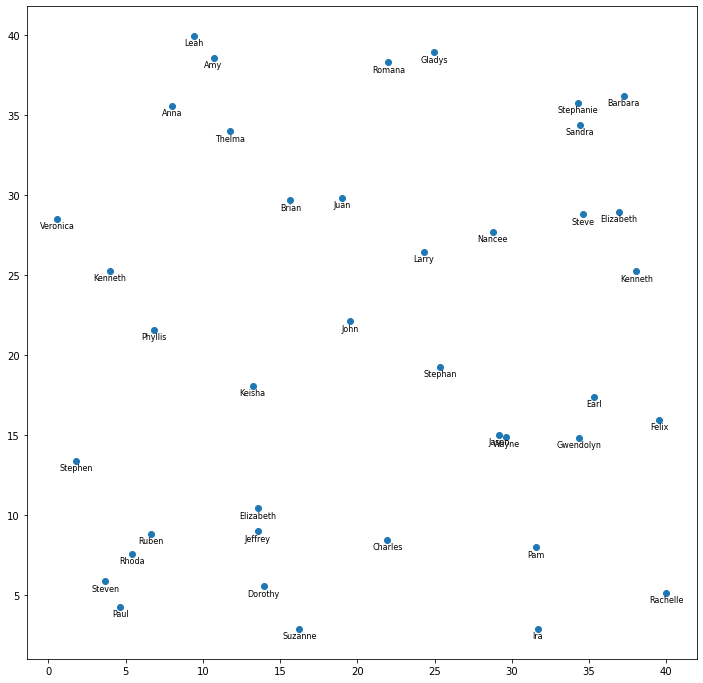

In [6]:
pontos_eixo_x = pontos_amigos[:,0]
pontos_eixo_y = pontos_amigos[:,1]

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(pontos_eixo_x,pontos_eixo_y)

for i,name in enumerate(nomes_amigos):
    ax.annotate(name,(pontos_eixo_x[i],pontos_eixo_y[i]-0.6),fontsize=8,ha='center')

plt.show()

## Dividir e conquistar

A implementação abaixo foi baseada no livro "Competitive Programming in Python: 128 Algorithms to Develop Your Coding Skills", porém foi modificada bruscamente para se adequar ao nosso trabalho, o objetivo do código é retornar o valor da menor distância e qual é o ponto(índice da lista) que faz parte deste par mais próximo de pontos

In [7]:
from math import hypot # hypot(dx, dy) = sqrt(dx * dx + dy * dy)

def dist(p, q):
    return hypot(p[0] - q[0], p[1] - q[1]) # Euclidean dist.

def cell(point, size):
    x, y = point # size = grid cell side length
    return (int(x // size), int(y // size))

def improve(S, d):
    G = {} # maps grid cell to its point
    for i,p in enumerate(S): # for every point
        a, b = cell(p, d / 2) # determine its grid cell
        for a1 in range(a - 2, a + 3):
            for b1 in range(b - 2, b + 3):
                if (a1, b1) in G: # compare with points
                    q = G[a1, b1] # in surrounding cells
                    pq = dist(p, q)
                    if pq < d: # improvement found
                        return pq, p, q, i
        G[a, b] = p
    return None

def closest_points(S):
    # shuffle(S)
    assert len(S) >= 2
    p = S[0] # start with distance between
    q = S[1] # first two points
    i = 1
    d = dist(p, q)
    while d > 0: # distance 0 cannot be improved
        r = improve(S, d)
        if r: # distance improved
            d, p, q, i = r
        else: # r is None: could not improve
            break
    return d, p, q, i

Abaixo vamos criar uma versão interativa que vai simular o encontro dos amigos mais próximos até estes amigos todos se reunirem

In [8]:
while True:
    if len(pontos_amigos) == 1:
        break
    d,p,q,i = closest_points(pontos_amigos)
    pontos_amigos = np.delete(pontos_amigos,i,0)
    del(nomes_amigos[i])
    print(len(pontos_amigos),len(nomes_amigos))

39 39
38 38
37 37
36 36
35 35
34 34
33 33
32 32
31 31
30 30
29 29
28 28
27 27
26 26
25 25
24 24
23 23
22 22
21 21
20 20
19 19
18 18
17 17
16 16
15 15
14 14
13 13
12 12
11 11
10 10
9 9
8 8
7 7
6 6
5 5
4 4
3 3
2 2
1 1
